In [10]:
import numpy as np
import sympy as sp
import pandas as pd
from itertools import combinations
from numpy import linalg as LA
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform
from multiprocessing import Process
import warnings
warnings.filterwarnings("error")


In [146]:
def soft_em (x, m):
    eps, max_step = 0.0001, 10000
    step = 0
    alpha = np.random.rand()
    lmd_1 = np.random.uniform(0.1, 3)
    lmd_0 = np.random.uniform(0.1, 3)
    w = np.array([alpha, 1 - alpha])
    theta = np.array([lmd_1, lmd_0])
    while True:
        try:
            prev_theta, prev_w = theta, w
            p = theta[:, None] / (x**(theta[:, None] + 1))
            py = ((w * p.T).T / np.sum((w * p.T).T, axis = 0))
            w = np.mean(py, axis=1)
            theta = np.sum(py, axis=1) / np.sum(np.log(x) * py, axis=1)
            if np.all(np.abs(theta - prev_theta) < eps) and np.all(np.abs(w - prev_w) < eps):
                break
        except:
            print(w, theta, step)
            break
        step += 1
    return w, theta, step


In [30]:
def run_for_a_dataset(m, n):
    alpha = np.random.rand()
    lmd_1 = np.random.uniform(0.01, 3)
    lmd_0 = np.random.uniform(0.01, 3)
    w_true = np.array([alpha, 1 - alpha])
    theta_true = np.array([lmd_1, lmd_0])
    x_1 = np.random.pareto(theta_true[0], n) + 1
    x_2 = np.random.pareto(theta_true[1], n) + 1
    x = np.concatenate((x_1[:int(w_true[0] * n)], x_2[:int(w_true[1] * n)]))
    w_pred, theta_pred, step = soft_em(x, m)
    return w_true, theta_true, w_pred, theta_pred, step

In [48]:
data_sets, results = 100, np.array([])
for i in range(data_sets):
    m, n = 2, 1000
    results = np.append(results, run_for_a_dataset(m, n))

In [49]:
len(results)

500

In [94]:
w_true = results[0::5]
theta_true = results[1::5]
w_pred = results[2::5]
theta_pred = results[3::5]
for i in range(data_sets):
    if (w_true[i][0] > 0.5 and w_pred[i][0] < 0.5) or (w_true[i][0] < 0.5 and w_pred[i][0] > 0.5):
        w_pred[i][0], w_pred[i][1] = w_pred[i][1], w_pred[i][0]
        theta_pred[i][0], theta_pred[i][1] = theta_pred[i][1], theta_pred[i][0]

In [118]:
w_diff = np.abs(np.concatenate(w_true - w_pred, axis = 0))
w_0_diff = w_diff[0::2]
w_1_diff = w_diff[1::2]
theta_diff = np.abs(np.concatenate(theta_true - theta_pred, axis = 0))
lambda_1_diff = theta_diff[0::2]
lambda_0_diff = theta_diff[1::2]

Text(0.5, 1.0, 'Difference in \\lambda_0')

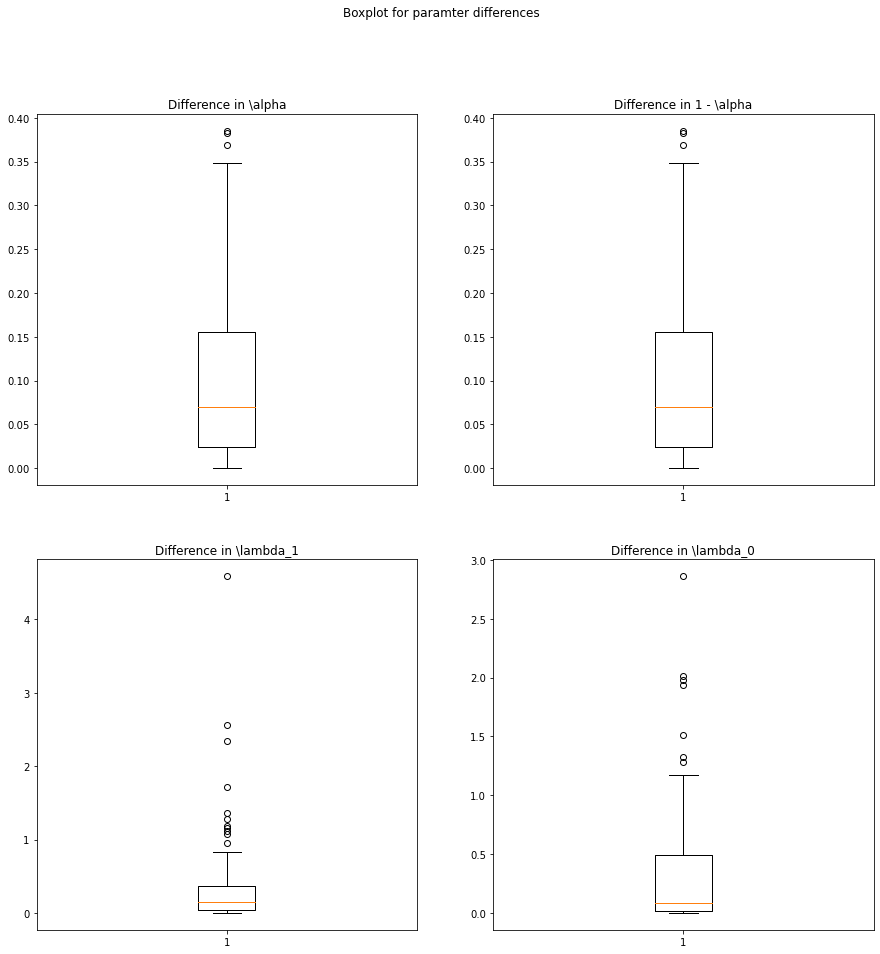

In [147]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Boxplot for paramter differences")
ax[0, 0].boxplot(w_0_diff)
ax[0, 0].set_title("Difference in \\alpha")
ax[0, 1].boxplot(w_1_diff)
ax[0, 1].set_title("Difference in 1 - \\alpha")
ax[1, 0].boxplot(lambda_1_diff)
ax[1, 0].set_title("Difference in \\lambda_1")
ax[1, 1].boxplot(lambda_0_diff)
ax[1, 1].set_title("Difference in \\lambda_0")


In [145]:
print("Mean absolute difference (\\alpha) = " + str(np.mean(w_0_diff)))
print("Mean absolute difference (1 - \\alpha) = " + str(np.mean(w_1_diff)))
print("Mean absolute difference (\\lambda_1) = " + str(np.mean(lambda_1_diff)))
print("Mean absolute difference (\\lambda_0) = " + str(np.mean(lambda_0_diff)))


Mean absolute difference (\alpha) = 0.10525395212126394
Mean absolute difference (1 - \alpha) = 0.10525395212126394
Mean absolute difference (\lambda_1) = 0.366816910982778
Mean absolute difference (\lambda_0) = 0.33752129248324614
